# Prelude

Let's first import the essentials:

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Word cloud

Let's first import the emails as a table:

In [20]:
hillary_emails = pd.read_csv("hillary-clinton-emails/Emails.csv")
hillary_emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Then, extract the subjects and texts of the emails, since the other columns are not interesting for a word cloud:

In [21]:
hillary_emails_subjects = hillary_emails["MetadataSubject"].str.cat(sep=" ")
hillary_emails_texts = hillary_emails["RawText"].str.cat(sep=" ")
hillary_text = hillary_emails_subjects + " " + hillary_emails_texts

And create the cloud:

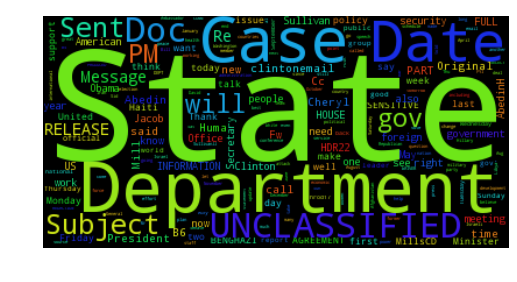

In [22]:
from wordcloud import WordCloud

hillary_emails_cloud = WordCloud().generate(hillary_text)

plt.imshow(hillary_emails_cloud)
plt.axis("off")
plt.show()

Unsurprisingly for the Secretary of State, the two most common words are "State" and "Department".

Now let's do it "properly" and have a pipeline with tokenization, stopword removal, and stemming.

In [ ]:
# Run this if you've never run it before
import nltk
nltk.download("all")

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string # for punctuation

def pipeline_text(text):
    # Tokenize the words (good thing there's a regex class for them... :) )
    # also make them lowercase to ease the rest
    words = [w.lower() for w in RegexpTokenizer("\w+").tokenize(text)]
    
    # Remove the stopwords;
    # we add some common abbreviations seen in emails
    # (we generated the cloud once then re-generated it after adding these)
    stop_words = stopwords.words("english") + ["fw", "fwd", "re", "cc", "am", "pm"]
    nostop_words = [w for w in words if w not in stop_words]
    
    # Remove punctuation, we don't care about it either
    nopunct_words = [w for w in nostop_words if w not in string.punctuation]
    
    # Stem words, i.e. remove suffixes so that "connect" and "connection" are equivalent
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in nopunct_words]

    # Lemmatize the words, which is fancy-speak for "make them singular", e.g. wolves -> wolf
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words]

    # Aaaand we're done
    return lemmatized_words

In [24]:
pipelined_hillary_words = pipeline_text(hillary_text)

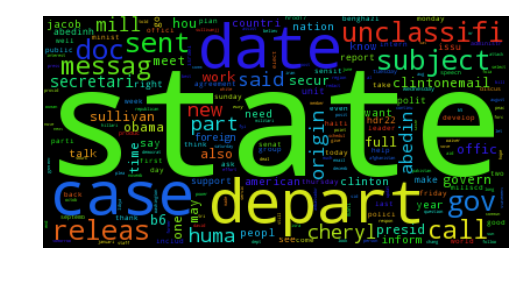

In [25]:
# The pipeline returns words, we need a long string for the word cloud
pipelined_hillary_text = " ".join(pipelined_hillary_words)

pipelined_cloud = WordCloud().generate(pipelined_hillary_text)

plt.imshow(pipelined_cloud)
plt.axis("off")
plt.show()

Unsurprisingly, "State" and "Depart[ment]" are still on the top. We also see a lot of names, such as Clinton's assistant Huma Abedin.

# Part 2: Countries

Good thing there's a Python module for that...

In [18]:
from pycountry import countries

In [68]:
# Make a map from a country to each email that mentions it
mentioned_countries = {}

for _, email in hillary_emails.iterrows():
    for word in RegexpTokenizer("\w+").tokenize(email["RawText"]):
        # PyCountry throws errors when a lookup fails :|
        try:
            # To avoid false positives, we only check on the name.
            # Otherwise, common words like "IT", "US", etc. become countries,
            # and there are also tons of small countries whose 2- or 3- letter abbreviations are words;
            # we doubt that Clinton was talking about St. Barthelemy or Christmas Island much. :)
            country = countries.get(name=word)
        except:
            continue
        
        if country.name not in mentioned_countries:
            mentioned_countries[country.name] = set()
            
        # Emails can't be hashed cause they're pandas Series, so we put their ID instead
        mentioned_countries[country.name].add(email["Id"])

In [33]:
# http://www.nltk.org/howto/sentiment.html shows use of Vader
# NLTK, I am your father! ...sorry, had to make that joke.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Compute the polarities for each email
polarities_by_email = {}
intensity_analyzer = SentimentIntensityAnalyzer()

for _, email in hillary_emails.iterrows():
    # Again, emails can't be hashed, thus we use IDs
    polarities_by_email[email["Id"]] = intensity_analyzer.polarity_scores(email["RawText"])

In [69]:
# Create a frame with all polarities per country
polarities_of_countries = []
for country, emails in mentioned_countries.items():
    for email_id in emails:
        # "compound" is the aggregate, i.e. we care about both positive and negative feelings
        polarity = polarities_by_email[email_id]["compound"]
        polarities_of_countries.append([country, polarity])
        
polarities_frame = pd.DataFrame(polarities_of_countries, columns=["Country", "Polarity"])

# Now sort the frame, so we see all countries in the "right" order.
sorted_polarities_frame = polarities_frame.groupby("Country").mean().sort_values(by="Polarity")

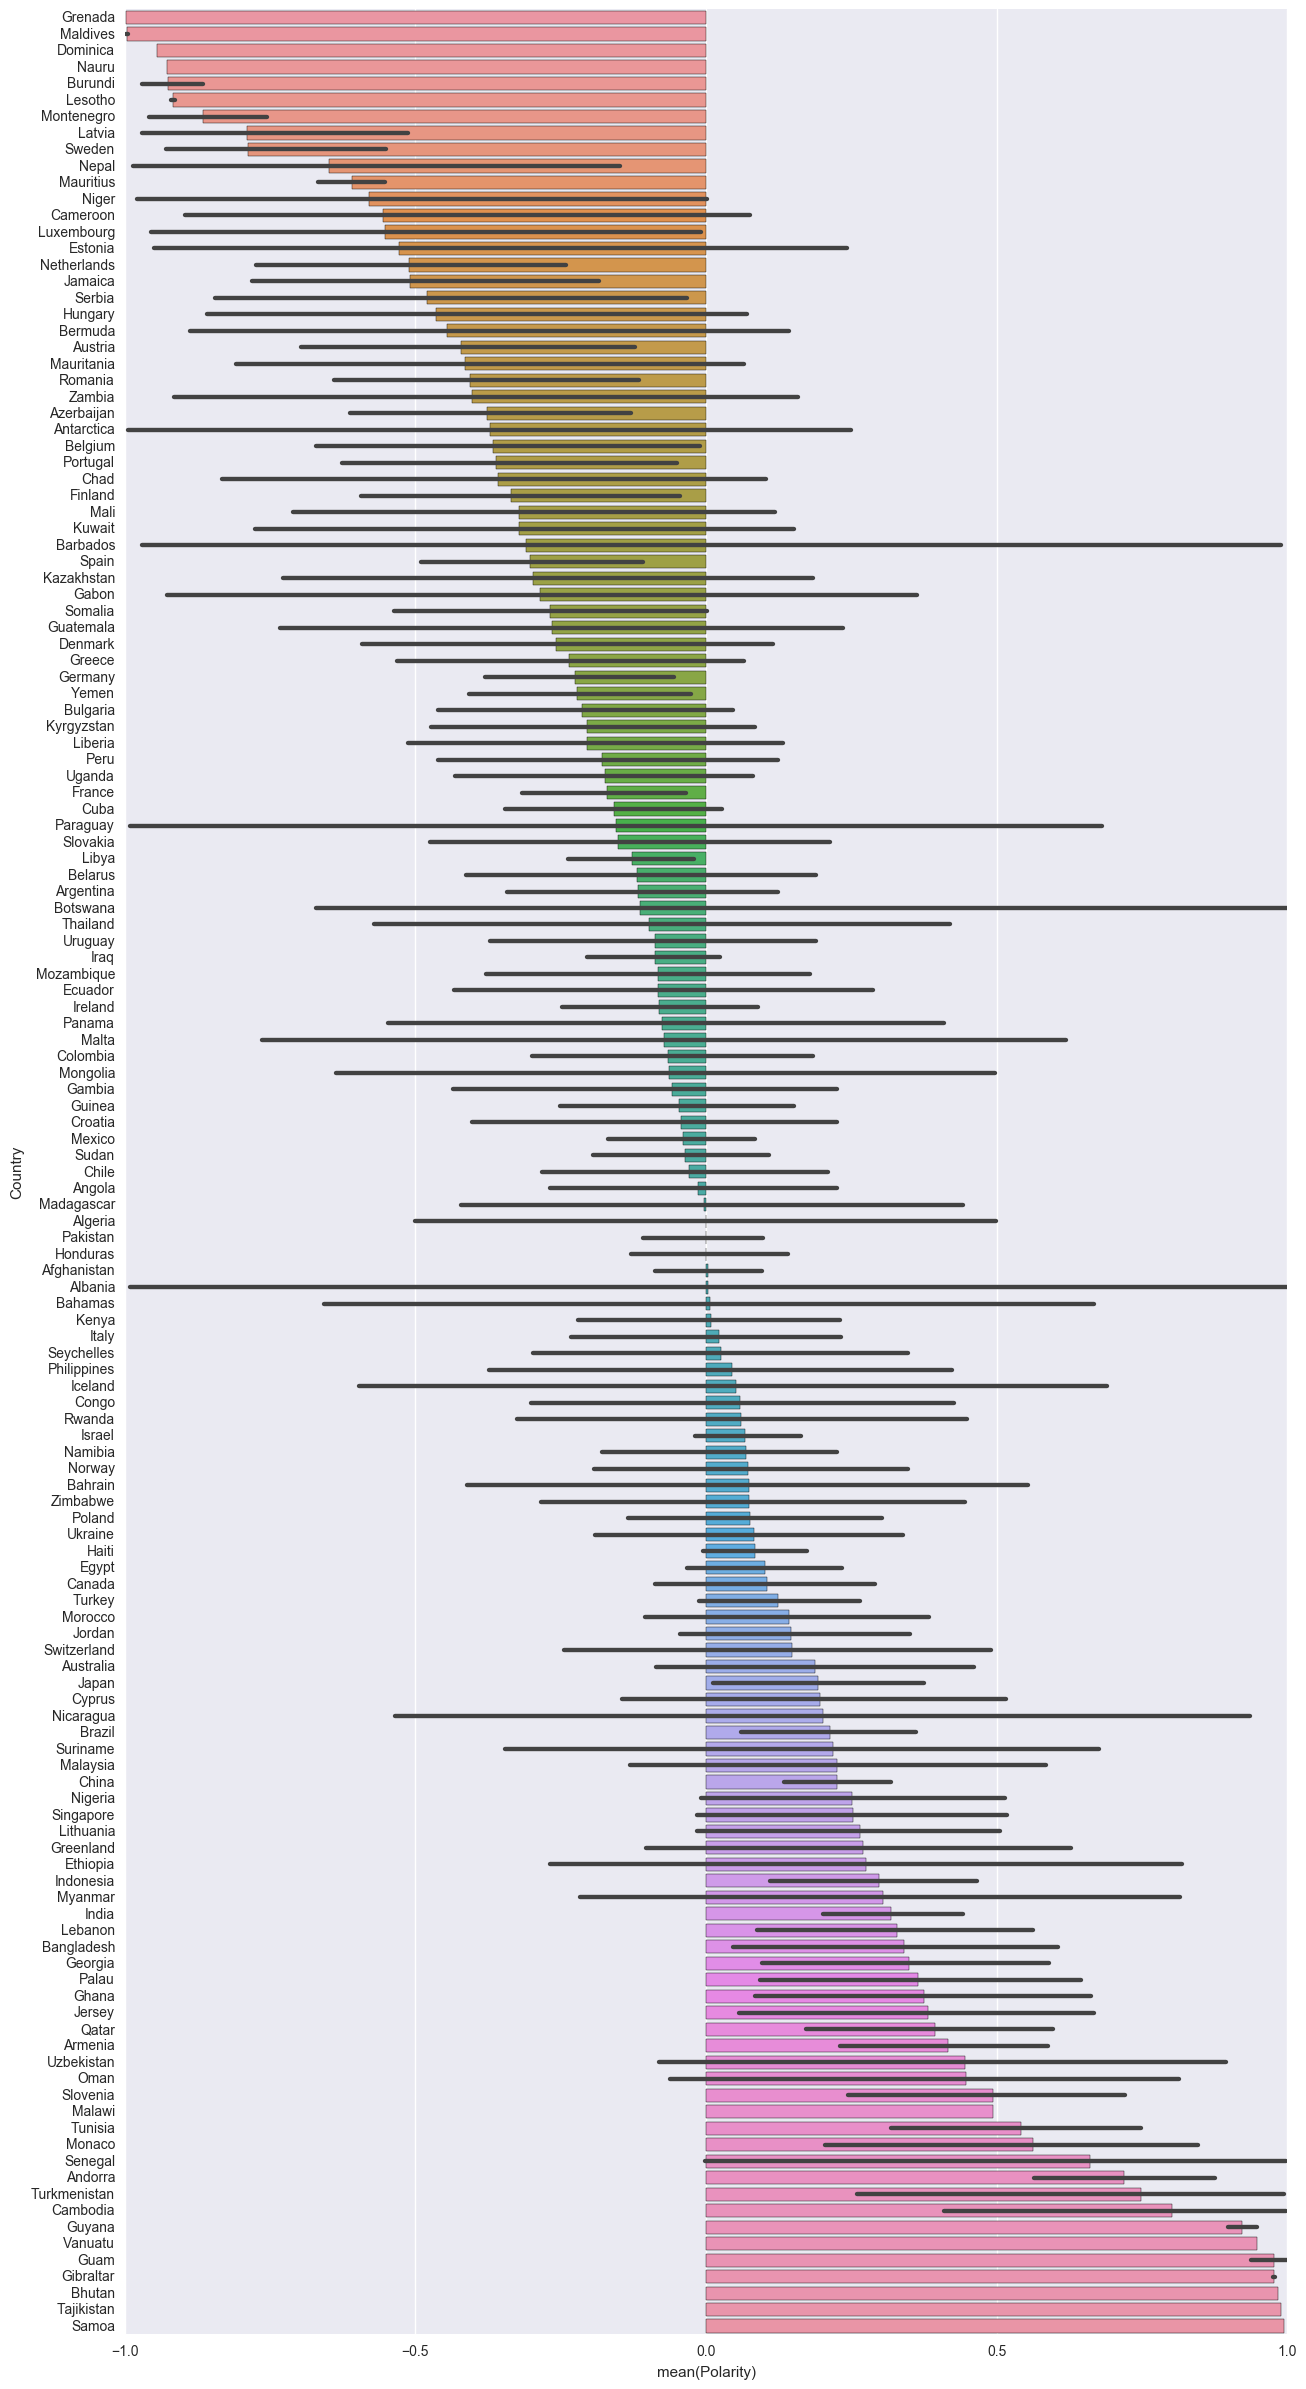

In [71]:
# Make a pretty plot! (well, at least, make a plot...)
# First set the size... these values seem to work. They're kinda weird though.
plt.subplots(figsize=(15,30))
# We tried with x = country y = polarity, it's completely unreadable.
sns.barplot(x="Polarity", 
            y="Country", 
            # Can't show the sorted frame directly though :()
            data=polarities_frame,
            order=sorted_polarities_frame.index)
plt.show()

One may need glasses to read the names, but it's relatively readable...

The variance is enormous, though, which makes a lot of data points pretty useless.

Also, from playing around with PyCountries, we notice that there are probably a lot of missed references, since e.g. "Vietnam" is not counsidered a country while "Viet Nam" is. While the latter may be the technically correct name, most people would just write it "Vietnam".